## Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Importing DataSet

In [2]:
#Loading Dataset
df=pd.read_csv("Desktop/OnlinePaymentFraudDetection2.csv")
df.head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


## Exploring Dataset

In [3]:
# ndim gives dimension of the dataset
df.ndim

2

In [4]:
# shape gives no.of cols & rows of the given dataset
df.shape

(1048575, 9)

In [5]:
#size of the dataset
df.size

9437175

In [6]:
# info gives information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1048575 non-null  object 
 1   amount          1048575 non-null  float64
 2   nameOrig        1048575 non-null  object 
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   nameDest        1048575 non-null  object 
 6   oldbalanceDest  1048575 non-null  float64
 7   newbalanceDest  1048575 non-null  float64
 8   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 72.0+ MB


In [7]:
#Describe() gives mathmetical information of the columns of the only type float64 
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [8]:
#Describe() gives mathmetical information of the all columns 
df.describe(include="all")

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06
unique,5,NaN,1048317,NaN,NaN,449635,NaN,NaN,NaN
top,CASH_OUT,NaN,C94343291,NaN,NaN,C985934102,NaN,NaN,NaN
freq,373641,NaN,2,NaN,NaN,98,NaN,NaN,NaN
mean,NaN,1.586670e+05,NaN,8.740095e+05,8.938089e+05,NaN,9.781600e+05,1.114198e+06,1.089097e-03
std,NaN,2.649409e+05,NaN,2.971751e+06,3.008271e+06,NaN,2.296780e+06,2.416593e+06,3.298351e-02
min,NaN,1.000000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,1.214907e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,7.634333e+04,NaN,1.600200e+04,0.000000e+00,NaN,1.263772e+05,2.182604e+05,0.000000e+00
75%,NaN,2.137619e+05,NaN,1.366420e+05,1.746000e+05,NaN,9.159235e+05,1.149808e+06,0.000000e+00


## Data Processing & Cleaning

In [9]:
#checking the null values
df.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
#datatypes of the columns
df.dtypes

type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

## Data Formatting

In [12]:
# converting categorical values into numeric values
df['type'] = df['type'].map({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4,'others':5})

In [11]:
# converting numerical values to categorical values
df['isFraud'] = df['isFraud'].map({0:'No_Fraud', 1:'Fraud'})

In [22]:
# Total No.of Frauds and No_frauds in DataSet
df['isFraud'].value_counts()

No_Fraud    1047433
Fraud          1142
Name: isFraud, dtype: int64

In [11]:
# Total No.of Transactions of each type
type=df.type.value_counts()
type

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

## Data Visualization

<AxesSubplot:xlabel='isFraud', ylabel='count'>

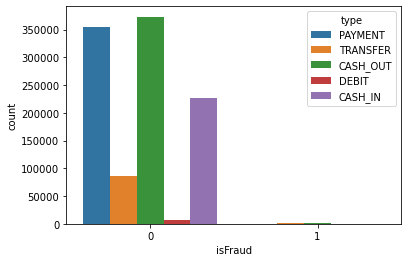

In [12]:
# Count of frauds and NoFrauds in each type of transaction
import seaborn as sns
sns.countplot(x="isFraud",hue="type",data=df)

<AxesSubplot:xlabel='type', ylabel='isFraud'>

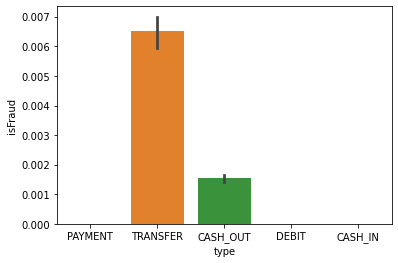

In [13]:
# Barplot for identify the frauds in each type transactions
sns.barplot(x=df["type"],y=df["isFraud"])

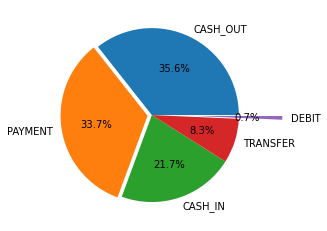

In [14]:
# pie plot for knowing which type of the trasaction type is more
plt.pie(type,labels=type.index,autopct="%.1f%%",explode=(0,0.05,0,0,0.5))
plt.show()

C:\Users\SATYADEVI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

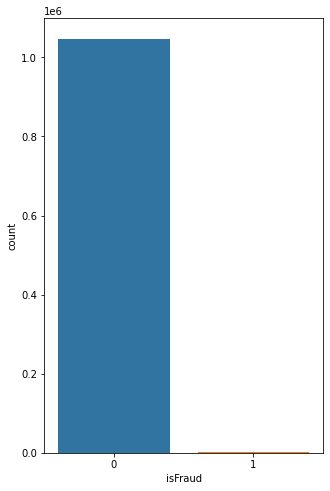

In [15]:
# seaborn countplot() method is used to show the counts of observations in each categorical bin using bars
plt.figure(figsize=(5,8))
sns.countplot(df['isFraud'])

<AxesSubplot:>

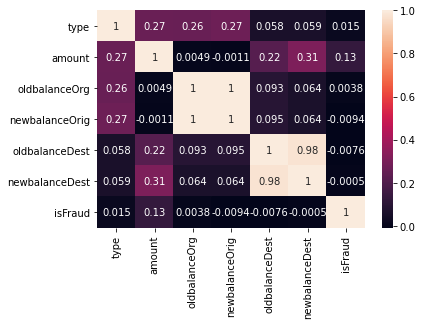

In [17]:
# heatmap represents the coefficients to visualize the strength of correlation among variables. It helps find features that are best for model
sns.heatmap(df.corr(),annot=True)

In [19]:
# corrolation is used know the relationship b/w among the columns
corr=df.corr()
corr

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,1.000000,0.265263,0.262623,0.272537,0.057842,0.059061,0.014645
amount,0.265263,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,0.262623,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,0.272537,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,0.057842,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,0.059061,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.014645,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


In [20]:
# relationship between isFraud column and other columns.
corr['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
type              0.014645
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
Name: isFraud, dtype: float64

In [48]:
df.head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,No_Fraud
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,No_Fraud
2,3,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud
3,0,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,No_Fraud
5,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,No_Fraud
6,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,No_Fraud
7,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,No_Fraud
8,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,No_Fraud
9,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,No_Fraud


## Splitting the Dataset into Training & Testing Sets

In [49]:
# features of the dataset
X = np.array(df[['type', 'amount', 'oldbalanceOrg','newbalanceDest']])

In [50]:
# target of the dataset
y = np.array(df[['isFraud']])

In [51]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
print("The shape of the training set=(",X_train.shape,y_train.shape,")")
print("The Shape of the testing set=(",X_test.shape,y_test.shape,")")

The shape of the training set=( (786431, 4) (786431, 1) )
The Shape of the testing set=( (262144, 4) (262144, 1) )


## Model Development

In [27]:
# Training a model using logisticRegression algorithm
from sklearn.linear_model import LogisticRegression 
model= LogisticRegression()
model.fit(X_train, y_train)

C:\Users\SATYADEVI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [28]:
model.score(X_train,y_train)

0.9989178961663515

In [29]:
# checking accuracy of LogisticRegression
model.score(X_test, y_test)

0.9988899230957031

In [30]:
# Training a model using KneighborClasification algorithm
from sklearn.neighbors import KNeighborsClassifier
model_dt = KNeighborsClassifier()
model_dt.fit(X_train, y_train)

<ipython-input-30-d796ca6350ac>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_dt.fit(X_train, y_train)


KNeighborsClassifier()

In [31]:
# checking accuracy for KneighborClassifier
model_dt.score(X_train,y_train)

0.9993680310160713

In [32]:
model_dt.score(X_test, y_test)

0.9992027282714844

In [53]:
# Training a model using DecisionTree algorithm
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [54]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
# checking accuracy for DecisionTree
model_dt.score(X_train,y_train)

1.0

In [56]:
model_dt.score(X_test, y_test)

0.9991455078125

## Model Evaluation

In [37]:
# for ploting DecisionTree we use the below three lines of code
model_dt=model_dt.fit(X,y)

In [38]:
data=tree.export_graphviz(model_dt,out_file=None)

In [47]:
import pydotplus
graph=pydotplus.graph_from_dot_data(data)

In [112]:
img=pltimg.imread("project.png")

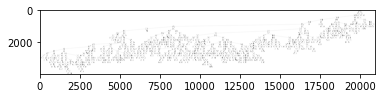

In [113]:
imgplot=plt.imshow(img)
plt.show()

## Predictions

In [57]:
# predicted values 
y_pred=model_dt.predict(X_test)
y_pred

array(['No_Fraud', 'No_Fraud', 'No_Fraud', ..., 'No_Fraud', 'No_Fraud',
       'No_Fraud'], dtype=object)

In [58]:
# predictiong for random values
data = np.array([[3,1000,2000,3333334444]])
predict=model_dt.predict(data)
print(predict)

['No_Fraud']


In [59]:
data1 = np.array([[3,1000,2000,45]])
print(model_dt.predict(data1))

['Fraud']


In [60]:
Type=int(input("Enter a type Transaction{0:Cash_Out,1:Payment,2:Cash_in,3:Transfer,4:Debit,5:others}:"))
amount=float(input("Enter the amount:"))
Org_oldbalance=float(input("Enter the old balance of sender :"))
Dest_newbalance=float(input("Enter the new balance of receiver:"))

Enter a type Transaction{0:Cash_Out,1:Payment,2:Cash_in,3:Transfer,4:Debit,5:others}:3
Enter the amount:1000
Enter the old balance of sender :2000
Enter the new balance of receiver:1000


In [61]:
data1 = np.array([[Type,amount,Org_oldbalance,Dest_newbalance]])
print(model_dt.predict(data1))

['No_Fraud']


In [62]:
Type=int(input("Enter a type Transaction{0:Cash_Out,1:Payment,2:Cash_in,3:Transfer,4:Debit,5:others}:"))
amount=int(input("Enter the amount:"))
Org_oldbalance=int(input("Enter the old balance of sender :"))
Dest_newbalance=int(input("Enter the new balance of receiver :"))

Enter a type Transaction{0:Cash_Out,1:Payment,2:Cash_in,3:Transfer,4:Debit,5:others}:3
Enter the amount:1000
Enter the old balance of sender :2000
Enter the new balance of receiver :0


In [63]:
data1 = np.array([[Type,amount,Org_oldbalance,Dest_newbalance]])
print(model_dt.predict(data1))

['Fraud']


#### print the minimum and maximum amount of fraud and No Fraud

In [12]:
df.groupby('isFraud').agg({'amount':['min','max']})

amount             
            min          max
isFraud                     
Fraud     119.0  10000000.00
No_Fraud    0.1   6419835.27